# Principles of Data Mining and Machine Learning (2023)

# Decision Trees

#### Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: 
- buying price, 
- price of maintenance, 
- number of doors, 
- capacity in terms of persons to carry, 
- the relative size of the luggage boot, and 
- the estimated safety value of each car.

#### The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 
1) unacceptable, 
2) acceptable, 
3) good, or 
4) very good.


In addition to developing an ML model, you also need to visualize a trees based on your developed models. 
The tree can be visualized using graphviz library.


Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.

Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html


Resources for drawing a tree using Graphviz:


https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1


In [1]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

### Import Libraries.

In [2]:
import numpy as np
import pandas as pd
#from pandas import DataFrame, Series

from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [3]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
import pydotplus

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

### Read and display datasets.

In [4]:
df1 = pd.read_csv('car_evaluation_0.csv')
df1.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
427    vhigh       low   5more      more         med   high      acc
428    vhigh       low   5more      more         big    low    unacc
429    vhigh       low   5more      more         big    med      acc
430    vhigh       low   5more      more         big   high      acc
431     high     vhigh       2         2       small    low    unacc

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [6]:
df2 = pd.read_csv('car_evaluation_1.csv')
df2.head()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
0     high     vhigh       2         2       small    med    unacc
1     high     vhigh       2         2       small   high    unacc
2     high     vhigh       2         2         med    low    unacc
3     high     vhigh       2         2         med    med    unacc
4     high     vhigh       2         2         med   high    unacc

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [8]:
df3 = pd.read_csv('car_evaluation_2.csv')
df3.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
427      med       low   5more      more         med   high    vgood
428      med       low   5more      more         big    low    unacc
429      med       low   5more      more         big    med     good
430      med       low   5more      more         big   high    vgood
431      low     vhigh       2         2       small    low    unacc

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [10]:
df4 = pd.read_csv('car_evaluation_3.csv')
df4.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
426      low       low   5more      more         med    med     good
427      low       low   5more      more         med   high    vgood
428      low       low   5more      more         big    low    unacc
429      low       low   5more      more         big    med     good
430      low       low   5more      more         big   high    vgood

In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     431 non-null    object
 1   maintCost    431 non-null    object
 2   noDoors      431 non-null    object
 3   noPersons    431 non-null    object
 4   bootLuggage  431 non-null    object
 5   safety       431 non-null    object
 6   decision     431 non-null    object
dtypes: object(7)
memory usage: 23.7+ KB


In [12]:
# It is clear that the data-files have the same set of features and do not have NaN values.
# Therefore, we can combine them by row.

### Combine the data after reading from multiple files

In [13]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
0    vhigh     vhigh       2         2       small    med    unacc
1    vhigh     vhigh       2         2       small   high    unacc
2    vhigh     vhigh       2         2         med    low    unacc
3    vhigh     vhigh       2         2         med    med    unacc
4    vhigh     vhigh       2         2         med   high    unacc

In [14]:
df.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
1722      low       low   5more      more         med    med     good
1723      low       low   5more      more         med   high    vgood
1724      low       low   5more      more         big    low    unacc
1725      low       low   5more      more         big    med     good
1726      low       low   5more      more         big   high    vgood

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
# 432*3 + 431 = 1728 rows - it's correct

# does not have NaN values !

### Data preprocessing

In [17]:
df['buyPrice'].value_counts()

buyPrice
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [18]:
df['maintCost'].value_counts()

maintCost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [19]:
df['noDoors'].value_counts()

noDoors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [20]:
df['noPersons'].value_counts()

noPersons
4       576
more    576
2       575
Name: count, dtype: int64

In [21]:
df['bootLuggage'].value_counts()

bootLuggage
med      576
big      576
small    575
Name: count, dtype: int64

In [22]:
df['safety'].value_counts()

safety
med     576
high    576
low     575
Name: count, dtype: int64

In [23]:
df['decision'].value_counts()

decision
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

#### All the specified features and the answer are ordinal features, that is, they can be ranked by importance.
<html> <h4 style="font-style:italic; color:red;">This way there is no need to use one hot encoding method, but rather a simple numerical ranking. </h1> </html>


In [24]:
# Performing Label Encoding

# Replacing 'low' by 1, 'med' by 2, 'high' by 3, 'vhigh' by 4

df.replace(to_replace=["low","med", "high", "vhigh"], value=[1,2,3,4], inplace=True)

In [25]:
# Replacing 'small' by 1, 'big' by 3

df.replace(to_replace=["small","big"], value=[1,3], inplace=True)

In [26]:
# Replacing '2' by 2, '3' by 3, '4' by 4, '5more' by 5 and 'more' big by 5

df.replace(to_replace=["2", "3", "4", "5more", "more"], value=[2,3,4,5,5], inplace=True)

In [27]:
# For answers - decision
# Replacing 'low' by 1, 'med' by 2, 'high' by 3, 'vhigh' by 4

df.replace(to_replace=["unacc","acc", "good", "vgood"], value=[1,2,3,4], inplace=True)

In [28]:
df

buyPrice  maintCost  noDoors  noPersons  bootLuggage  safety  decision
0            4          4        2          2            1       2         1
1            4          4        2          2            1       3         1
2            4          4        2          2            2       1         1
3            4          4        2          2            2       2         1
4            4          4        2          2            2       3         1
...        ...        ...      ...        ...          ...     ...       ...
1722         1          1        5          5            2       2         3
1723         1          1        5          5            2       3         4
1724         1          1        5          5            3       1         1
1725         1          1        5          5            3       2         3
1726         1          1        5          5            3       3         4

[1727 rows x 7 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [30]:
# memory size reduction

columns =['buyPrice', 'maintCost', 'noDoors', 'noPersons', 
          'bootLuggage', 'safety', 'decision']

for column in columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


In [32]:
# We reduced the memory size about 8 times

#### Separate input X and output y

In [33]:
# get X from data

X = df.drop('decision',axis=1).values

In [34]:
# get y from data

y = df['decision'].values

In [35]:
# Print shapes of X and y to make sure everything is good

# Print shape of X
print(X.shape)

# Print shape of y
print(y.shape)

# Print X
print(X)

# Print y
print(y)

(1727, 6)
(1727,)
[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]
[1 1 1 ... 1 3 4]


In [36]:
# separation for Training (90%) and Test samples (10%)

# 'Random_state' - it is an optional parameter. This is a seed for a random number generator and can be any.
# If it does not fix, everyone will have slightly different results, due to a random start.

#  The function returns four objects - two matrices of input values (X) and two answer-vectors (y)
# for the training and test parts of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1554, 6)
(173, 6)
(1554,)
(173,)


# Create Trees

### Split criteria - Entropy

In [ ]:
# Develop a Decision Tree Classifier based on Entropy split criteria 
# and fit into the train dataset

In [39]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

In [40]:
clf_entropy = clf_entropy.fit(X_train, y_train)

#### the tree visualisation

In [41]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name, '\n')
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

decision


In [42]:
tree.export_graphviz(clf_entropy, out_file='tree_grid_clf_entropy.dot', 
                feature_names=feature_name,  # replace index numbers with their names in the figure
                #class_names= [target_name],
                filled=True )  # color the vertices of the graph   

In [ ]:
# you can convert .dot to .png file in any way
# you can use online resources, for example (https://convert.world/convert-dot-to-png)
# (just don’t need to download the ad packages - refuse)

# after the conversion put the .png file into your current directory with this JupyterNoteBook

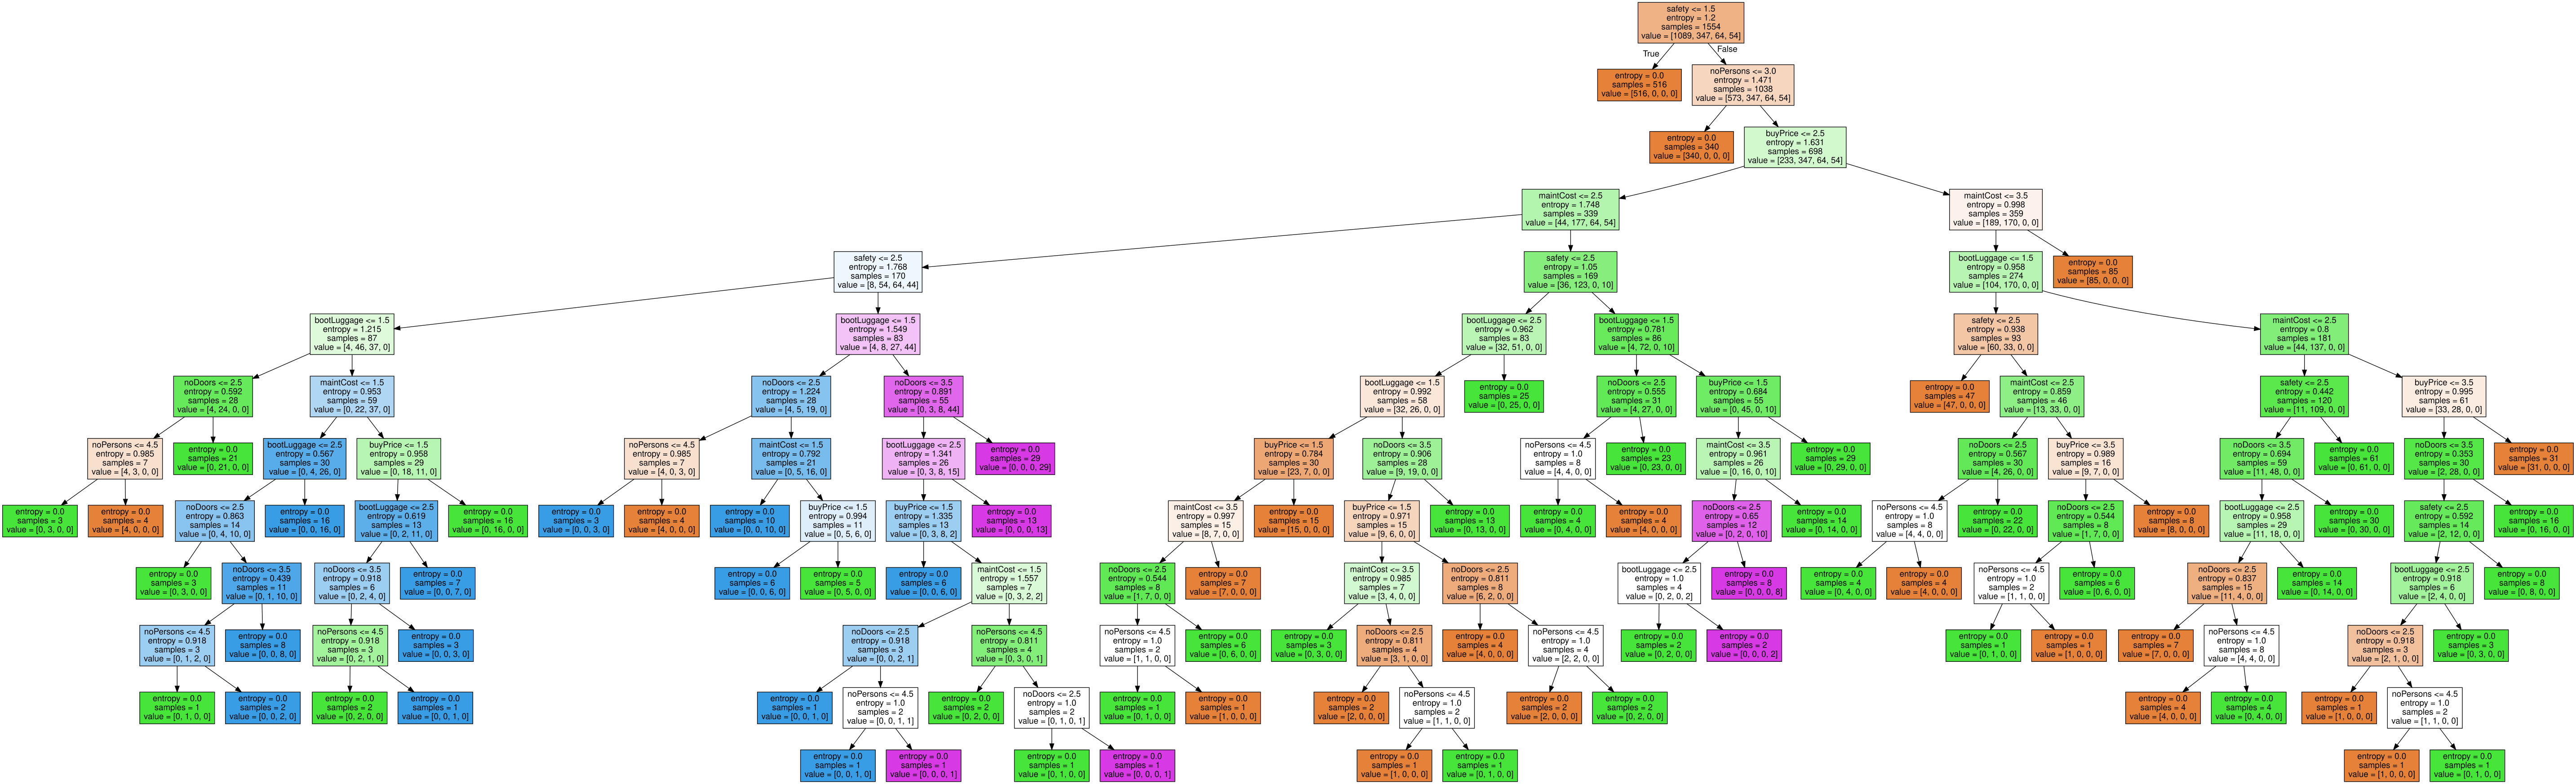

In [43]:
# View the tree image

display(Image('tree_grid_clf_entropy.png', unconfined=True))

##### Predict the values on the input test set.

##### Find accuracy, precision, recall, f-score.


In [52]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
# Create an empty list accuracy
accuracy = []

# Create an empty list train_scores_models
test_scores_DT_models = []

# Create an empty list of models
DT_models = []

In [63]:
y_pred = clf_entropy.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.9710982658959537
Precision test set:  0.9812138728323699
Recall test set:  0.9710982658959537
F-score test set:  0.9729135174621963
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       0.97      0.95      0.96        37
           3       0.56      1.00      0.71         5
           4       1.00      0.73      0.84        11

    accuracy                           0.97       173
   macro avg       0.88      0.92      0.88       173
weighted avg       0.98      0.97      0.97       173



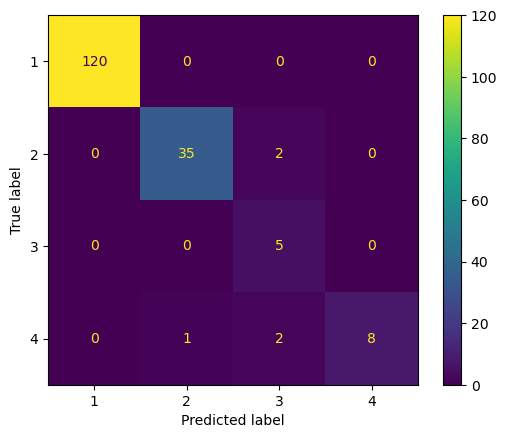

In [64]:
# Your code to display confusion matrix between predicted output and actual output

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_entropy.classes_)
disp.plot()
plt.show()

In [65]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[0])
test_scores_DT_models


[0.9710982658959537]

In [66]:
# add model to the list
DT_models.append('DT_Entropy')
DT_models

['DT_Entropy']

### Split criteria - Gini index

In [67]:
clf_gini = DecisionTreeClassifier(criterion='gini')

In [69]:
clf_gini = clf_gini.fit(X_train, y_train)

In [70]:
y_pred = clf_gini.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.9710982658959537
Precision test set:  0.9807964033397559
Recall test set:  0.9710982658959537
F-score test set:  0.9736220792965887
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      0.92      0.96        37
           3       0.56      1.00      0.71         5
           4       0.90      0.82      0.86        11

    accuracy                           0.97       173
   macro avg       0.86      0.93      0.88       173
weighted avg       0.98      0.97      0.97       173



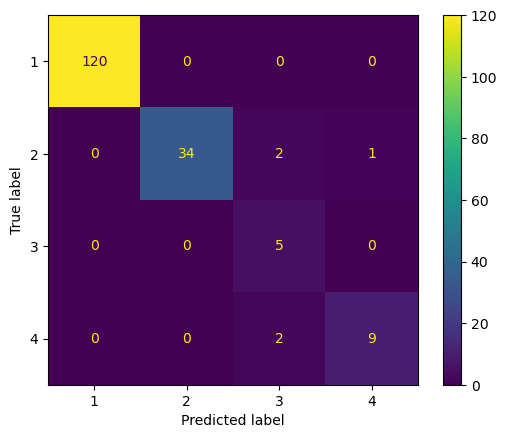

In [71]:
# Your code to display confusion matrix between predicted output and actual output

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_gini.classes_)
disp.plot()
plt.show()

In [72]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[1])
test_scores_DT_models

[0.9710982658959537, 0.9710982658959537]

In [73]:
# add model to the list
DT_models.append('DT_Gini')
DT_models

['DT_Entropy', 'DT_Gini']

In [ ]:
# Visualisation

In [82]:
tree.export_graphviz(clf_gini, out_file='tree_grid_clf_gini.dot', 
                feature_names=feature_name,  # replace index numbers with their names in the figure
                #class_names= [target_name],
                filled=True )  # color the vertices of the graph   

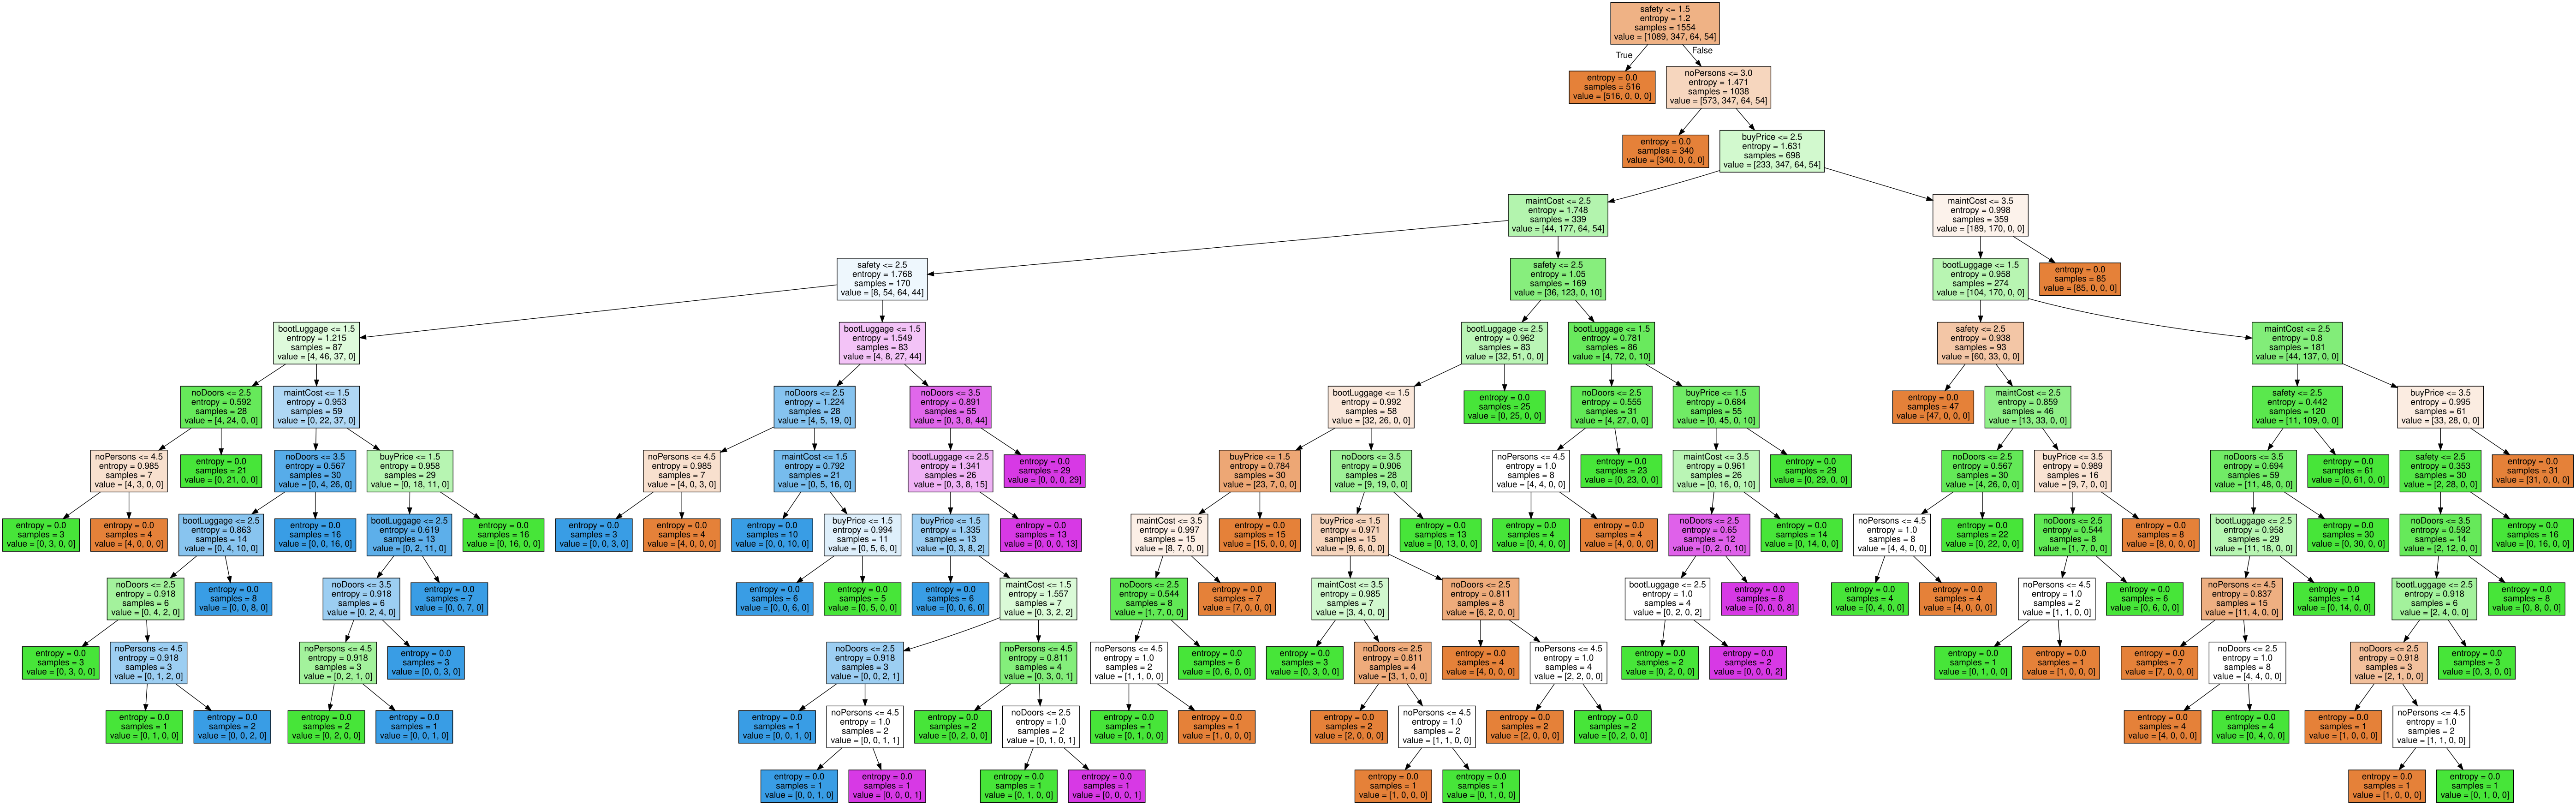

In [83]:
# View the tree image

display(Image('tree_grid_clf_gini.png', unconfined=True))

### Split criteria - loss

In [75]:
clf_loss = DecisionTreeClassifier(criterion='log_loss')

In [76]:
clf_loss = clf_loss.fit(X_train, y_train)

In [77]:
y_pred = clf_loss.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.9710982658959537
Precision test set:  0.9807964033397559
Recall test set:  0.9710982658959537
F-score test set:  0.9736220792965887
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      0.92      0.96        37
           3       0.56      1.00      0.71         5
           4       0.90      0.82      0.86        11

    accuracy                           0.97       173
   macro avg       0.86      0.93      0.88       173
weighted avg       0.98      0.97      0.97       173



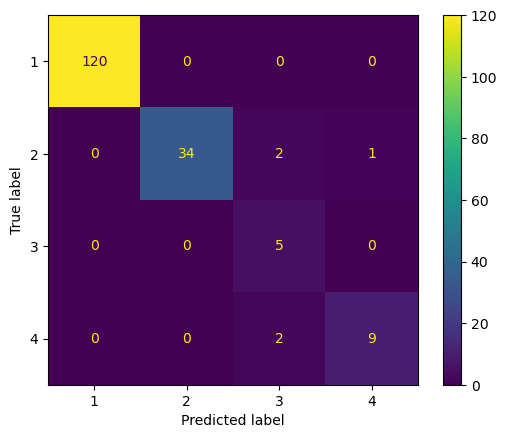

In [78]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_entropy.classes_)
disp.plot()
plt.show()

In [79]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[2])
test_scores_DT_models

[0.9710982658959537, 0.9710982658959537, 0.9710982658959537]

In [80]:
# add model to the list
DT_models.append('DT_Loss')
DT_models

['DT_Entropy', 'DT_Gini', 'DT_Loss']

In [81]:
# Accuracy did not change since we did not use a limit on the number of decision tree levels

In [84]:
# Visualisation

In [85]:
tree.export_graphviz(clf_loss, out_file='tree_grid_clf_loss.dot', 
                feature_names=feature_name,  # replace index numbers with their names in the figure
                #class_names= [target_name],
                filled=True )  # color the vertices of the graph   

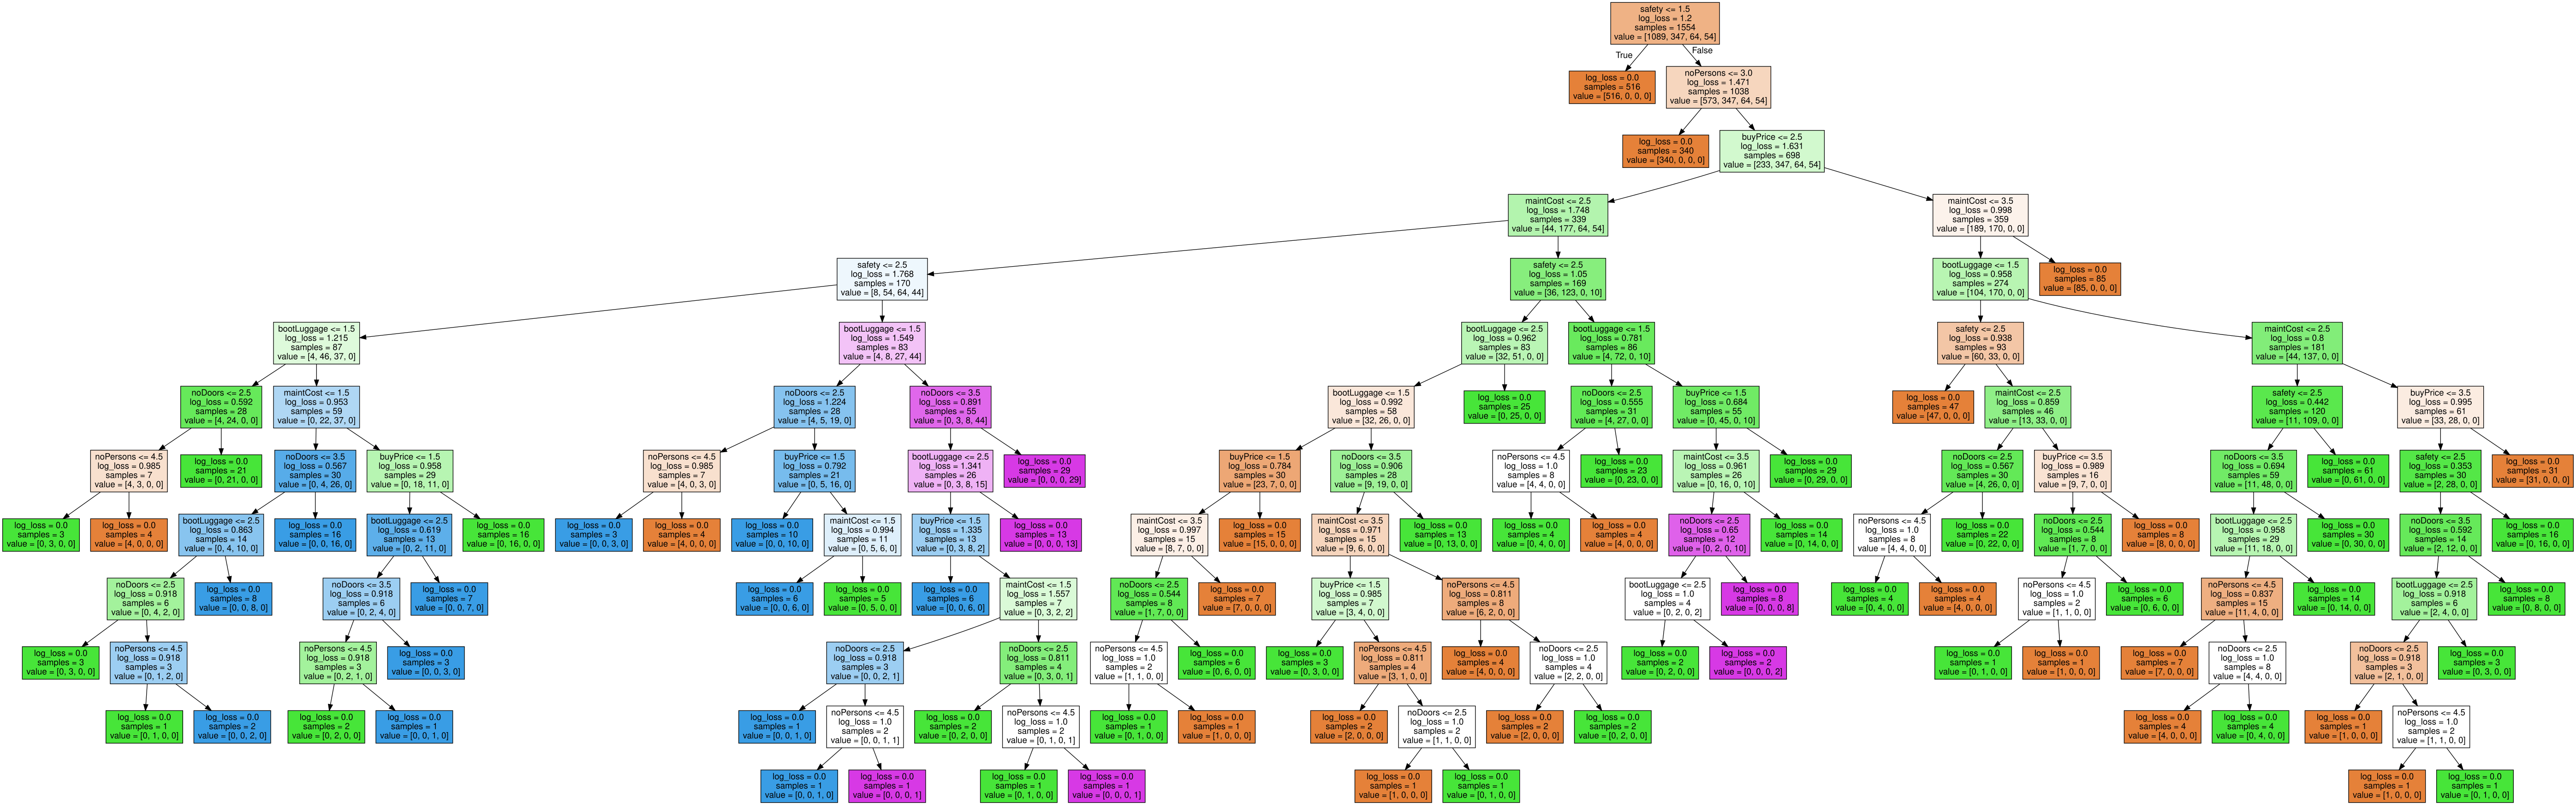

In [86]:
# View the tree image

display(Image('tree_grid_clf_loss.png', unconfined=True))

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):

1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy / gini index / loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?


In [ ]:
# Optional - The following is optional.

################################################################################
#
#
# Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [104]:
# Create an empty list accuracy

accuracy = []

# Create an empty list train_scores_models
test_scores_models = []

# Create an empty list of models
models = []

In [105]:
# As an DT accuracy practically the same that take only one 

# add model to the list
models.append('Decision_Tree')
print(models, '\n')

# add accuracy value for DT
test_scores_models.append(test_scores_DT_models[0])
test_scores_models

['Decision_Tree'] 



[0.9710982658959537]

## KNN

In [106]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
# evaluate the classifer on test data
 
y_pred = knn.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.953757225433526
Precision test set:  0.9599452920524914
Recall test set:  0.953757225433526
F-score test set:  0.9519020882826822
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       120
           2       0.90      0.95      0.92        37
           3       0.57      0.80      0.67         5
           4       1.00      0.55      0.71        11

    accuracy                           0.95       173
   macro avg       0.87      0.82      0.82       173
weighted avg       0.96      0.95      0.95       173



In [108]:
# add model to the list

models.append('k-NN')
print(models, '\n')

# add accuracy value for k-NN

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models


['Decision_Tree', 'k-NN'] 



[0.9710982658959537, 0.953757225433526]

## Logistic Regression

In [111]:
logisticRegression =  LogisticRegression(random_state = 0, max_iter=400)
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=0)

In [112]:
# evaluate the classifer on test data

y_pred = logisticRegression.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.8554913294797688
Precision test set:  0.8536111629063334
Recall test set:  0.8554913294797688
F-score test set:  0.8513328364140804
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       120
           2       0.71      0.59      0.65        37
           3       0.33      0.40      0.36         5
           4       1.00      0.73      0.84        11

    accuracy                           0.86       173
   macro avg       0.74      0.67      0.70       173
weighted avg       0.85      0.86      0.85       173



In [113]:
# add model to the list
models.append('logistic Regression')
print(models, '\n')

# add accuracy value for logistic Regression
test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models


['Decision_Tree', 'k-NN', 'logistic Regression'] 



[0.9710982658959537, 0.953757225433526, 0.8554913294797688]

## SVM

In [116]:
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)

SVC()

In [117]:
y_pred = SVM.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred))

Accuracy test set:  0.9364161849710982
Precision test set:  0.9451822481249702
Recall test set:  0.9364161849710982
F-score test set:  0.9372179346755414
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       120
           2       0.86      0.86      0.86        37
           3       0.50      0.80      0.62         5
           4       1.00      0.64      0.78        11

    accuracy                           0.94       173
   macro avg       0.84      0.82      0.81       173
weighted avg       0.95      0.94      0.94       173



In [118]:
# add model to the list
models.append('SVM')
print(models, '\n')

# add accuracy value for SVM

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

['Decision_Tree', 'k-NN', 'logistic Regression', 'SVM'] 



[0.9710982658959537, 0.953757225433526, 0.8554913294797688, 0.9364161849710982]

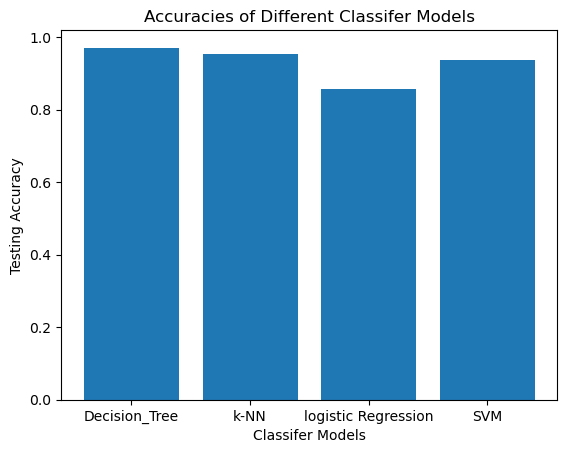

In [119]:
# Your code to plot and compare the performance of different algorithms

# Your code to plot accuracy vs kernels

plt.title('Accuracies of Different Сlassifer Models')    

plt.bar(models, test_scores_models)

plt.xlabel('Сlassifer Models')
plt.ylabel('Testing Accuracy')

plt.show()

Desision Tree accuracy is the best